In [12]:
from qiskit import *
from qiskit.visualization import *

In [13]:
def input_lights(lights,  qc, n):

    for index, value in enumerate(lights):
        if value == 1:
            qc.x(n+1+index)

In [14]:
def flip_adjacent(qc, n):
#     flip_dict = {0: [0, 1, 3], 1: [0, 1, 2, 4], 2: [1, 2, 5], 3: [0, 3, 4, 6], 4: [1, 3, 4, 5, 7], 5: [2, 4, 5, 8], 6: [3, 6, 7], 7: [4, 6, 7, 8], 8: [5, 7, 8]}

    qc.cx(0, n+2)
    qc.cx(0, n+3)
    qc.cx(0, n+5)
    
    qc.cx(1, n+2)
    qc.cx(1, n+3)
    qc.cx(1, n+4)
    qc.cx(1, n+6)
    
    qc.cx(2, n+3)
    qc.cx(2, n+4)
    qc.cx(2, n+7)
    
    qc.cx(3, n+2)
    qc.cx(3, n+5)
    qc.cx(3, n+6)
    qc.cx(3, n+8)
    
    qc.cx(4, n+3)
    qc.cx(4, n+5)
    qc.cx(4, n+6)
    qc.cx(4, n+7)
    qc.cx(4, n+9)
    
    qc.cx(5, n+4)
    qc.cx(5, n+6)
    qc.cx(5, n+7)
    qc.cx(5, n+10)
    
    qc.cx(6, n+5)
    qc.cx(6, n+8)
    qc.cx(6, n+9)
    
    qc.cx(7, n+6)
    qc.cx(7, n+8)
    qc.cx(7, n+9)
    qc.cx(7, n+10)
    
    qc.cx(8, n+7)
    qc.cx(8, n+9)
    qc.cx(8, n+10)

In [19]:
def oracle(n):
    qc = QuantumCircuit(n+n+1)
    
    flip_adjacent(qc, n-1)

    qc.x(range(n+1, n+n+1))

    control_qubits = [10, 11, 12, 13, 14, 15, 16, 17, 18]
    qc.mct(control_qubits, n)

    qc.x(range(n+1, n+n+1))

    flip_adjacent(qc, n-1)
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = 'Oracle'
    
    return oracle_gate

In [20]:
def diffuser(n):
    qc = QuantumCircuit(n)
    
    qc.x(range(n))
    qc.h(n-1)

    control_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
    qc.mct(control_qubits, n-1, n-1)

    qc.h(n-1)
    qc.x(range(n))
    
    diffuser_gate = qc.to_gate()
    diffuser_gate.name = 'Diffuser'
    
    return diffuser_gate

In [36]:
def main(lights, n):
    qc = QuantumCircuit(n+n+1, n)

    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    
    input_lights(lights, qc, n)
    qc.barrier()
    
    r = 1
    
    while(r > 0):
        oracle_gate = oracle(n)
        qc.append(oracle_gate, range(n+n+1))

        qc.h(range(n+1))

        diffuser_gate = diffuser(n)
        qc.append(diffuser_gate, range(n))

        qc.h(range(n))
        r = r-1

    qc.measure([8, 7, 6, 5, 4, 3, 2, 1, 0], range(n))
    qc.draw('mpl')
#     qc.measure([18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0], range(n+n))
#     qc.measure([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18], range(n+n))
    
    return qc

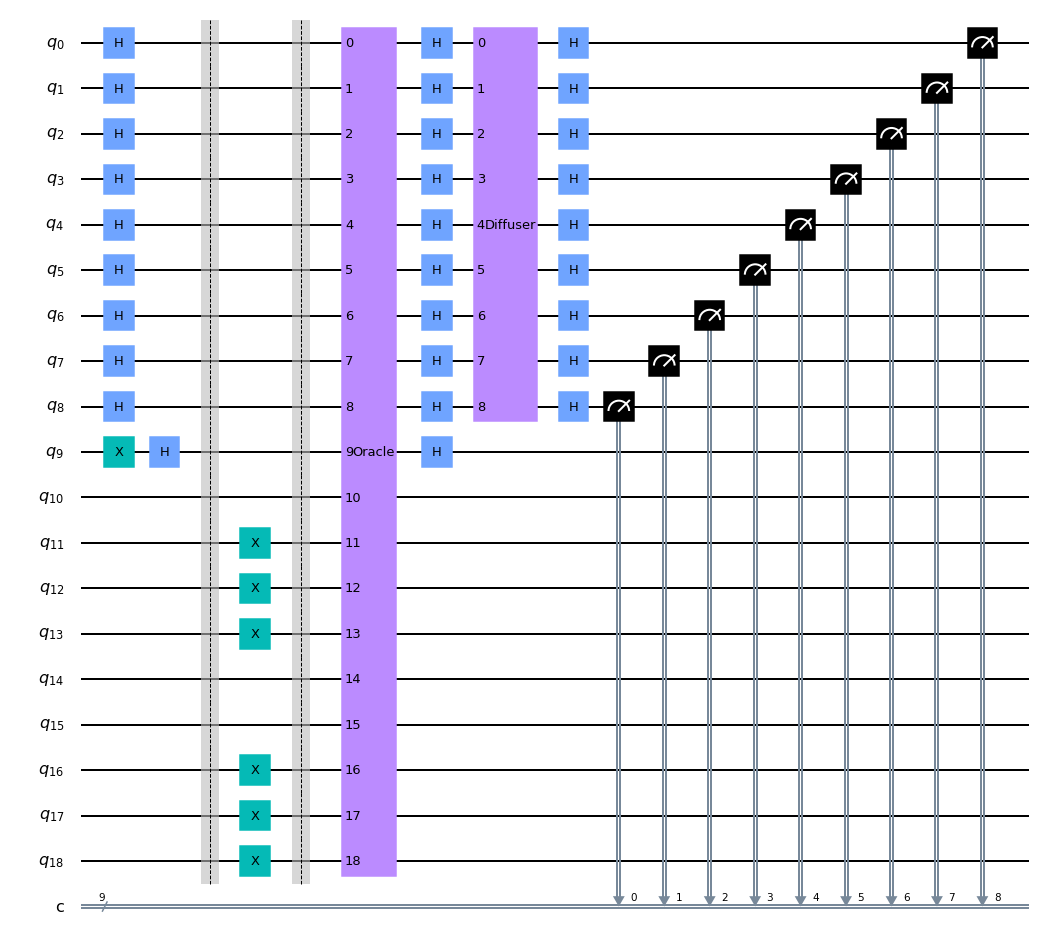

In [37]:
n = 9
lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]

qc = main(lights, n)
qc.draw('mpl')

{'000000000': 17, '000000001': 7, '000010000': 15, '100000000': 18, '100000001': 10, '100000010': 15, '100000011': 17, '100000100': 21, '100000101': 18, '100000110': 12, '100000111': 13, '100001000': 25, '100001001': 13, '100001010': 17, '100001011': 11, '100001100': 12, '100001101': 15, '100001110': 17, '100001111': 18, '000010001': 14, '100010000': 20, '100010001': 16, '100010010': 15, '100010011': 22, '100010100': 18, '100010101': 16, '100010110': 15, '100010111': 15, '100011000': 17, '100011001': 14, '100011010': 12, '100011011': 13, '100011100': 13, '100011101': 12, '100011110': 15, '100011111': 16, '000010010': 12, '100100000': 11, '100100001': 15, '100100010': 11, '100100011': 19, '100100100': 20, '100100101': 13, '100100110': 17, '100100111': 10, '100101000': 16, '100101001': 15, '100101010': 19, '100101011': 14, '100101100': 15, '100101101': 14, '100101110': 18, '100101111': 14, '000010011': 20, '100110000': 17, '100110001': 13, '100110010': 19, '100110011': 20, '100110100': 9

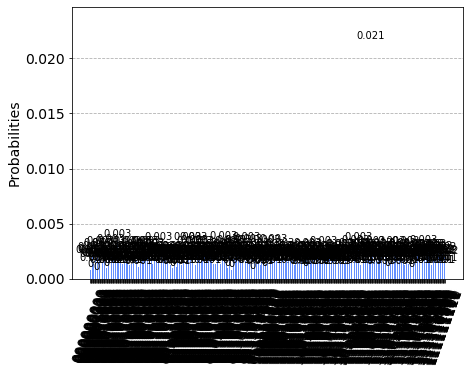

In [38]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

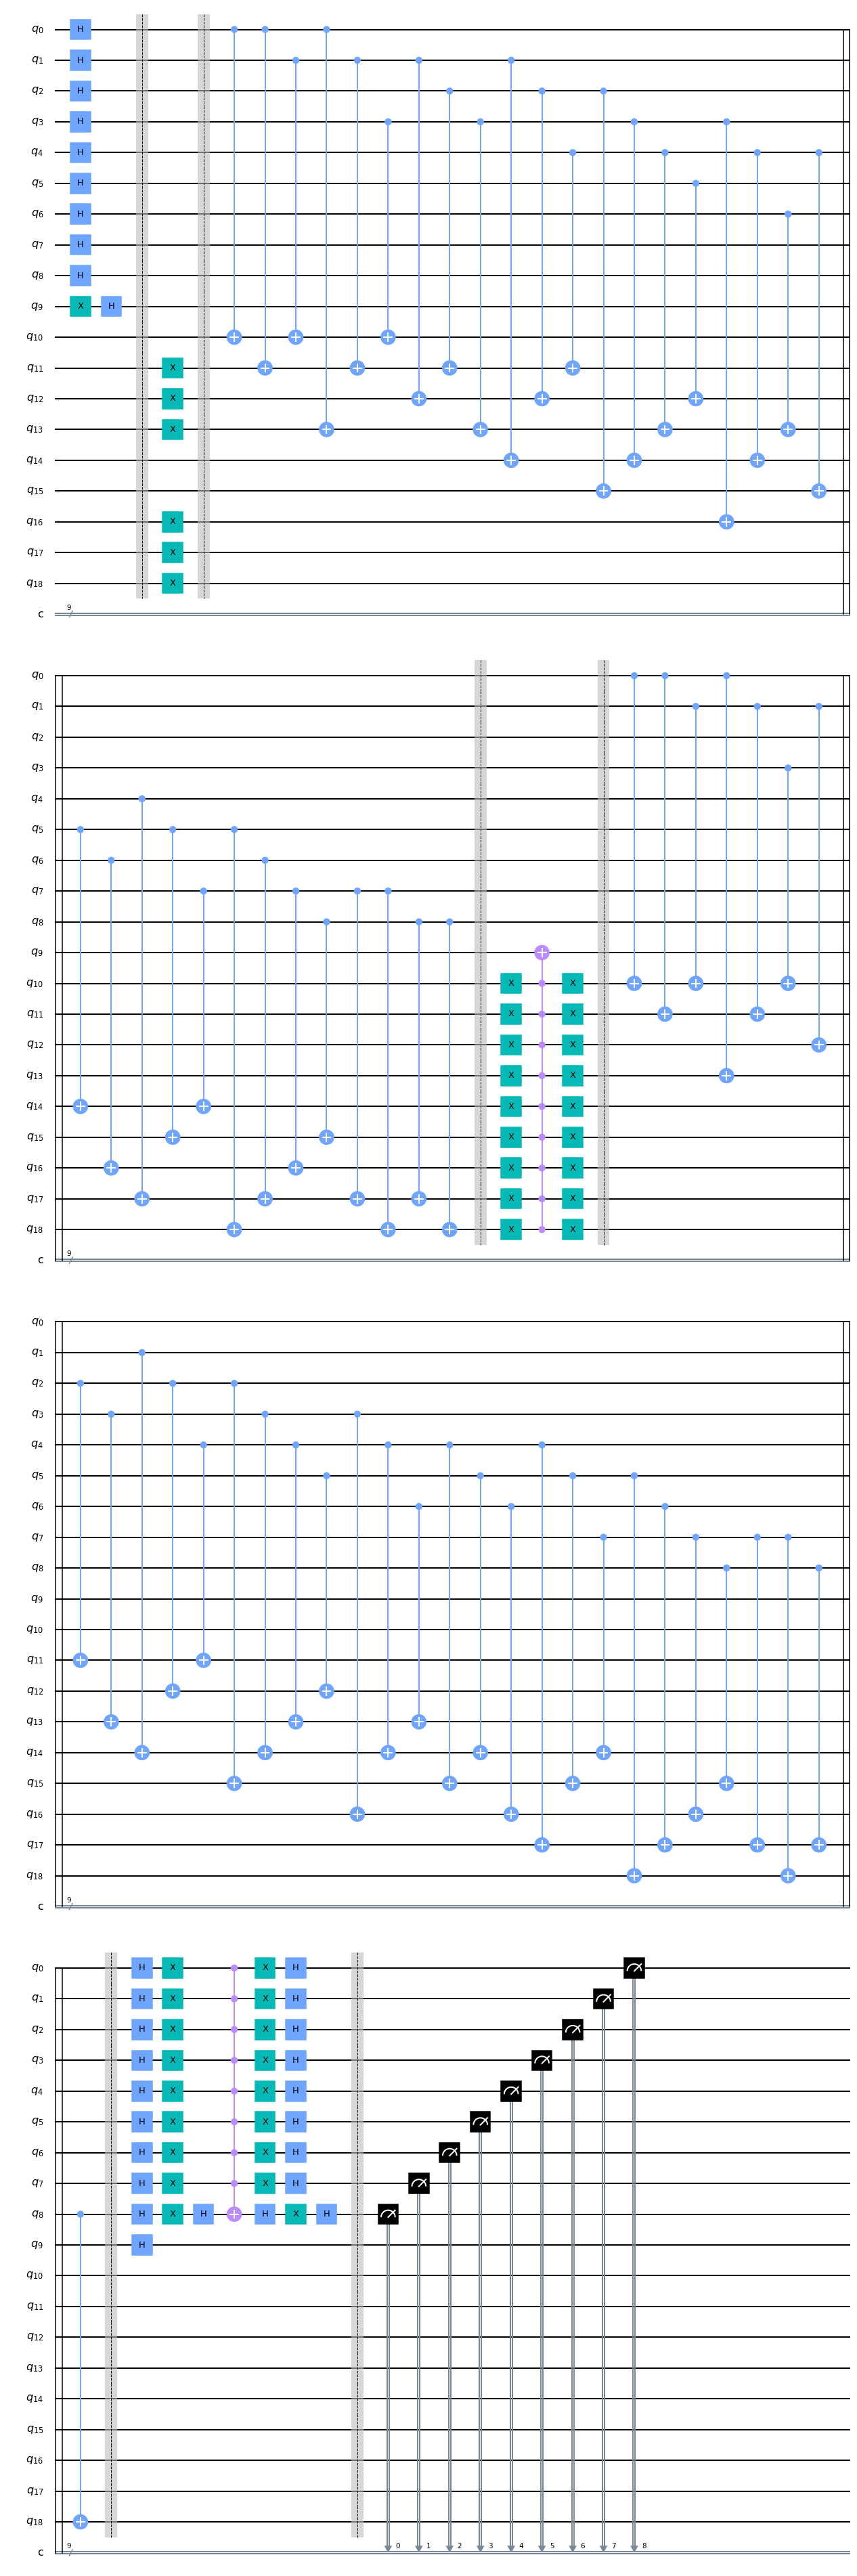